In [0]:
!pip uninstall tensorflow

In [0]:
!pip install tensorflow-gpu

In [0]:
import tensorflow as tf
import numpy as np

In [4]:
tf.__version__

'2.1.0'

In [5]:
if tf.test.is_gpu_available():
    print("\nYour GPU is available to TensorFlow\n")
else:
    print("\nYour GPU is NOT available to TensorFlow\n")

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.

Your GPU is available to TensorFlow



In [6]:
print(('Is your GPU available for use?\n{0}').format(
    'Yes, your GPU is available: True' if tf.test.is_gpu_available() == True else 'No, your GPU is NOT available: False'
))

Is your GPU available for use?
Yes, your GPU is available: True


In [0]:
import matplotlib.pyplot as plt
from tensorflow.keras.layers import AveragePooling2D, Conv2D
from tensorflow.keras.layers import Dense, Flatten, Reshape, Input, InputLayer
from tensorflow.keras import models, layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.initializers import RandomNormal
import matplotlib.pyplot as plt


In [0]:
import tensorboard
import tempfile
import zipfile
import os

In [0]:
%load_ext tensorboard

In [0]:
batch_size = 128
num_classes = 10
epochs = 50

In [11]:
# Data preprocessing and cleadning:
# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [12]:
if tf.keras.backend.image_data_format() == 'channels_first':
  X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
  X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
  input_shape = (1, img_rows, img_cols)
else:
  X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
  X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
  input_shape = (img_rows, img_cols, 1)

print("\n'input_shape' which will be used = {0}\n".format(input_shape))


'input_shape' which will be used = (28, 28, 1)



In [0]:
# Convert datasets to floating point types-
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalize the training and testing datasets-
X_train /= 255.0
X_test /= 255.0

In [0]:
# convert class vectors/target to binary class matrices or one-hot encoded values-
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [0]:
# Reshape training and testing sets-
X_train = X_train.reshape(X_train.shape[0], 784)
X_test = X_test.reshape(X_test.shape[0], 784)

In [16]:
print("\nDimensions of training and testing sets are:")
print("X_train.shape = {0}, y_train = {1}".format(X_train.shape, y_train.shape))
print("X_test.shape = {0}, y_test = {1}".format(X_test.shape, y_test.shape))


Dimensions of training and testing sets are:
X_train.shape = (60000, 784), y_train = (60000, 10)
X_test.shape = (10000, 784), y_test = (10000, 10)


In [0]:
l = tf.keras.layers

In [0]:
# del model

In [0]:
model = Sequential()
model.add(l.InputLayer(input_shape = (784, )))
model.add(Flatten())
model.add(Dense(units = 300, activation='relu', kernel_initializer = tf.initializers.GlorotUniform()))
model.add(l.Dropout(0.2))
model.add(Dense(units = 100, activation='relu', kernel_initializer = tf.initializers.GlorotUniform()))
model.add(l.Dropout(0.1))
model.add(Dense(units = num_classes, activation='softmax'))

In [32]:
# print summary of designed neural network-
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 300)               235500    
_________________________________________________________________
dropout_2 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 100)               30100     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
________________________________________________

In [0]:
# Define callbacks-
callbacks = [
              # tf.keras.callbacks.TensorBoard(log_dir=logdir, profile_batch = 0),
             tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 3)
]

In [0]:
# Compile designed CNN-
model.compile(
    loss = tf.keras.losses.categorical_crossentropy,
    optimizer = 'adam',
    metrics = ['accuracy'])

In [35]:
# Train CNN on training data-
history_original = model.fit(x = X_train, y = y_train,
          batch_size = batch_size,
          epochs = epochs,
          verbose = 1,
          callbacks = callbacks,
          validation_data = (X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 34us/sample - loss: 0.3164 - accuracy: 0.9065 - val_loss: 0.1283 - val_accuracy: 0.9601
Epoch 2/50
60000/60000 [==============================] - 2s 28us/sample - loss: 0.1289 - accuracy: 0.9610 - val_loss: 0.0903 - val_accuracy: 0.9724
Epoch 3/50
60000/60000 [==============================] - 2s 27us/sample - loss: 0.0953 - accuracy: 0.9709 - val_loss: 0.0760 - val_accuracy: 0.9764
Epoch 4/50
60000/60000 [==============================] - 2s 27us/sample - loss: 0.0737 - accuracy: 0.9774 - val_loss: 0.0681 - val_accuracy: 0.9793
Epoch 5/50
60000/60000 [==============================] - 2s 27us/sample - loss: 0.0588 - accuracy: 0.9813 - val_loss: 0.0765 - val_accuracy: 0.9743
Epoch 6/50
60000/60000 [==============================] - 2s 27us/sample - loss: 0.0514 - accuracy: 0.9833 - val_loss: 0.0676 - val_accuracy: 0.9781
Epoch 7/50
60000/60000 [==============================] 

In [36]:
# Evaluate trained model on testing dataset-
score_original = model.evaluate(X_test, y_test, verbose=0)

print("\nTesting dataset loss = {0:.4f} and accuracy = {1:.4f}\n".format(score_original[0], score_original[1]))


Testing dataset loss = 0.0636 and accuracy = 0.9810



**Visualizing Neural Network Training**

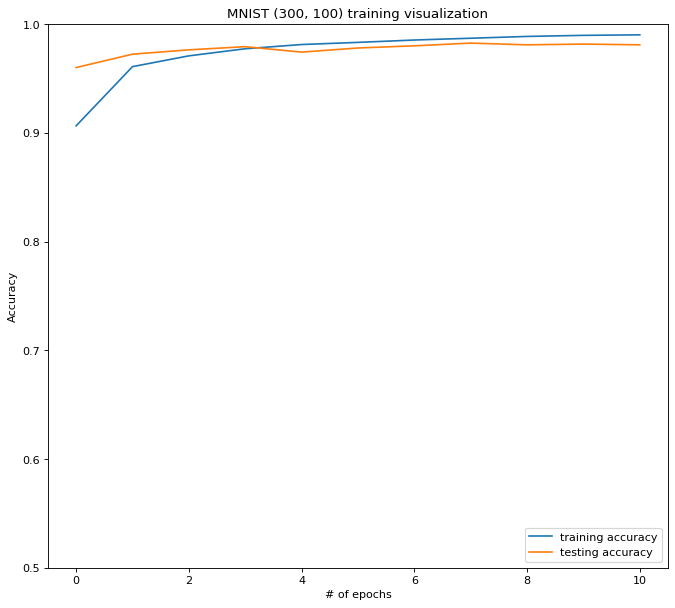

In [40]:
fig=plt.figure(figsize=(10, 9), dpi= 80, facecolor='w', edgecolor='k')

plt.plot(history_original.history['accuracy'], label='training accuracy')
plt.plot(history_original.history['val_accuracy'], label = 'testing accuracy')

plt.title("MNIST (300, 100) training visualization")
plt.xlabel('# of epochs')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')


In [41]:
type(model.trainable_weights), len(model.trainable_weights)

(list, 6)

In [42]:
print("\nShape or dimension of each layer in CNN:\n")

for layer in model.trainable_weights:
  print(layer.shape)


Shape or dimension of each layer in CNN:

(784, 300)
(300,)
(300, 100)
(100,)
(100, 10)
(10,)


In [0]:
!pip install tensorflow_model_optimization

In [0]:
from tensorflow_model_optimization.sparsity import keras as sparsity

**Neural Network Pruning:**

To show pruning works with neural networks, the model is first pruned and trained for another 12 epochs

In [45]:
epochs = 12

num_train_samples = X_train.shape[0]

end_step = np.ceil(1.0 * num_train_samples / batch_size).astype(np.int32) * epochs

print("end_step parameter for this dataset =  {0}".format(end_step))

end_step parameter for this dataset =  5628


In [0]:
# Specify the parameters to be used for layer-wise pruning:
pruning_params = {
    'pruning_schedule': sparsity.PolynomialDecay(
        initial_sparsity=0.50, final_sparsity=0.90,
        begin_step=2000, end_step=end_step, frequency=100)
}

In [47]:
pruned_model = Sequential()
pruned_model.add(l.InputLayer(input_shape=(784, )))
pruned_model.add(Flatten())
pruned_model.add(sparsity.prune_low_magnitude(Dense(units = 300, activation='relu', kernel_initializer=tf.initializers.GlorotUniform()),
                                              **pruning_params))
pruned_model.add(l.Dropout(0.2))
pruned_model.add(sparsity.prune_low_magnitude(Dense(units = 100, activation='relu', kernel_initializer=tf.initializers.GlorotUniform()),
                                              **pruning_params))
pruned_model.add(l.Dropout(0.1))
pruned_model.add(sparsity.prune_low_magnitude(Dense(units = num_classes, activation='softmax'), **pruning_params))

Instructions for updating:
Please use `layer.add_weight` method instead.


In [48]:
pruned_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
prune_low_magnitude_dense_9  (None, 300)               470702    
_________________________________________________________________
dropout_4 (Dropout)          (None, 300)               0         
_________________________________________________________________
prune_low_magnitude_dense_10 (None, 100)               60102     
_________________________________________________________________
dropout_5 (Dropout)          (None, 100)               0         
_________________________________________________________________
prune_low_magnitude_dense_11 (None, 10)                2012      
Total params: 532,816
Trainable params: 266,610
Non-trainable params: 266,206
__________________________________________

In [0]:
# Compile pruned CNN-
pruned_model.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer='adam',
    metrics=['accuracy'])

In [0]:
# Add a pruning step callback to peg the pruning step to the optimizer's
# step. Also add a callback to add pruning summaries to tensorboard
callbacks = [
             sparsity.UpdatePruningStep(),
             # sparsity.PruningSummaries(log_dir = logdir, profile_batch=0),
             tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 3)
]

In [51]:
# Train pruned CNN-
history_pruned = pruned_model.fit(x = X_train, y = y_train,
          batch_size = batch_size,
          epochs = 12,
          verbose = 1,
          callbacks = callbacks,
          validation_data = (X_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 4s 64us/sample - loss: 0.3161 - accuracy: 0.9062 - val_loss: 0.1313 - val_accuracy: 0.9604
Epoch 2/12
60000/60000 [==============================] - 3s 48us/sample - loss: 0.1317 - accuracy: 0.9610 - val_loss: 0.0953 - val_accuracy: 0.9720
Epoch 3/12
60000/60000 [==============================] - 3s 49us/sample - loss: 0.0950 - accuracy: 0.9707 - val_loss: 0.0759 - val_accuracy: 0.9761
Epoch 4/12
60000/60000 [==============================] - 3s 48us/sample - loss: 0.0740 - accuracy: 0.9768 - val_loss: 0.0697 - val_accuracy: 0.9777
Epoch 5/12
60000/60000 [==============================] - 3s 49us/sample - loss: 0.0630 - accuracy: 0.9811 - val_loss: 0.0633 - val_accuracy: 0.9813
Epoch 6/12
60000/60000 [==============================] - 3s 49us/sample - loss: 0.0612 - accuracy: 0.9814 - val_loss: 0.0680 - val_accuracy: 0.9784
Epoch 7/12
60000/60000 [==============================] 

In [52]:
# Evaluate pruned trained model on testing dataset-
score = pruned_model.evaluate(X_test, y_test, verbose=0)

print("\nTesting dataset loss = {0:.4f} and accuracy = {1:.4f}\n".format(score[0], score[1]))


Testing dataset loss = 0.0513 and accuracy = 0.9843



**Visualizing Pruned Neural Network Training**

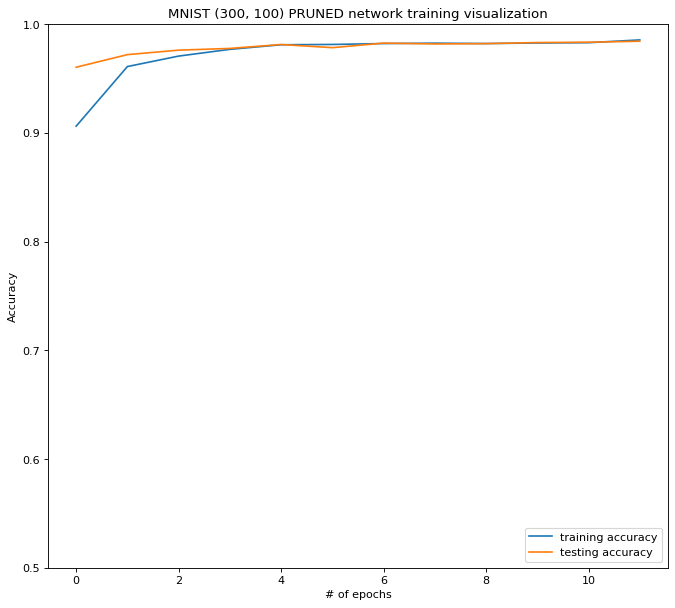

In [53]:
fig=plt.figure(figsize=(10, 9), dpi= 80, facecolor='w', edgecolor='k')

plt.plot(history_pruned.history['accuracy'], label='training accuracy')
plt.plot(history_pruned.history['val_accuracy'], label = 'testing accuracy')

plt.title("MNIST (300, 100) PRUNED network training visualization")
plt.xlabel('# of epochs')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')


In [0]:
# Strip the pruning wrappers from pruned model-
final_model_layer_wise = sparsity.strip_pruning(pruned_model)

In [55]:
# Get stripped and pruned model summary-
final_model_layer_wise.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 300)               235500    
_________________________________________________________________
dropout_4 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 100)               30100     
_________________________________________________________________
dropout_5 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
________________________________________________

In [56]:
print("\nIn original unpruned model, number of nonzero parameters in each layer are: \n")

orig_sum_params = 0

for layer in model.trainable_weights:
  print(tf.math.count_nonzero(layer, axis = None).numpy())
  orig_sum_params += tf.math.count_nonzero(layer, axis = None).numpy()

print("\nTotal number of trainable parameters = {0}\n".format(orig_sum_params))


In original unpruned model, number of nonzero parameters in each layer are: 

235200
300
30000
100
1000
10

Total number of trainable parameters = 266610



In [57]:
print("\nIn pruned model: layer-wise manner, number of nonzero parameters in each layer are: \n")

pruned_sum_params = 0

for layer in final_model_layer_wise.trainable_weights:
  print(tf.math.count_nonzero(layer, axis = None).numpy())
  pruned_sum_params += tf.math.count_nonzero(layer, axis = None).numpy()

print("\nTotal number of trainable parameters = {0}\n".format(pruned_sum_params))


In pruned model: layer-wise manner, number of nonzero parameters in each layer are: 

23520
300
3000
100
100
10

Total number of trainable parameters = 27030



In [58]:
print("\n% of connections pruned away = {0:.4f}\n".format(((orig_sum_params - pruned_sum_params) / orig_sum_params) * 100))


% of connections pruned away = 89.8616

